In [1]:
import numpy as np
import time
import os
from collections import namedtuple, deque

from unityagents import UnityEnvironment
from agent_utils import env_initialize, plot_training_scores

from dqn_agent import DQN_Agent
from trainers import train_dqn

import matplotlib.pyplot as plt
%matplotlib inline

SEED = 42
PATH_TO_ENV = 'Banana_Windows_x86_64/Banana.exe'

In [2]:
env = UnityEnvironment(file_name=PATH_TO_ENV)

# gather scenario information
brain, brain_name, state, action_size, state_size = env_initialize(env)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# Optional: uncomment lines below to demo a uniform-random agent
#from demos import demo_random_agent_discrete
#demo_random_agent_discrete(env, n_episodes=2, train_mode=False)

In [4]:
# create parameters, anything omitted will take on the appropriate default value
# agent params contains the same values as the defaults, for reference
agent_params = {
    'name':'default_dqn',
    'layers':[64, 64],
    'buffer_size':int(1e5),
    'batch_size':64,
    'update_every':4,
    'copy_every':4,
    'learning_rate':5e-4,
    'gamma':0.99,
    'tau':1e-3,
}

naners_params = {
    'name':'Agent Naners',
    'layers':[32, 32],
    'copy_every':8
}

# create agent, inspect params
agent = DQN_Agent(state_size, action_size, brain_name, SEED, params=naners_params)
print(agent.display_params())

Agent Naners: h[32, 32], exp[100000, 64], u,c[4, 8], g,t,lr[0.99, 0.001, 0.0005]


## Training Function

In [5]:
n_episodes=800
print_every=100

goal_score = 13
score_window_size = 100
keep_training = True

epsilon_start = 1.0
epsilon_end = 0.001
epsilon_decay = 0.995

scores = train_dqn(env, agent, n_episodes=n_episodes, goal_score=goal_score,
                  score_window_size=score_window_size,
                  keep_training=keep_training, print_every=print_every,
                  eps_start=epsilon_start, eps_end=epsilon_end, eps_decay=epsilon_decay)

Saved agent parameters at saved_agents/Agent Naners/

Training started for 'Agent Naners'...
Episode 100	Avg. Score: 0.96	Avg. Duration: 1.3821s	Epsilon: 0.605770
Episode 200	Avg. Score: 4.22	Avg. Duration: 1.4041s	Epsilon: 0.366958
Episode 300	Avg. Score: 6.94	Avg. Duration: 1.3922s	Epsilon: 0.222292
Episode 400	Avg. Score: 9.72	Avg. Duration: 1.3748s	Epsilon: 0.134658
Episode 500	Avg. Score: 12.22	Avg. Duration: 1.3896s	Epsilon: 0.081572
Episode 581	Avg. Score: 13.05	Avg. Duration: 1.5178s	Epsilon: 0.054351

Environment solved in 581 episodes!
Average Score for last 100 episodes: 13.05	Goal: 13
Total Duration: 13.77m

Saved local_weights.pyt at saved_agents/Agent Naners/
Saved target_weights.pyt at saved_agents/Agent Naners/
Saved scores as scores.npy at saved_agents/Agent Naners/

Continuing training...
Episode 600	Avg. Score: 12.84	Avg. Duration: 1.5274s	Epsilon: 0.049414
Episode 700	Avg. Score: 14.87	Avg. Duration: 1.4063s	Epsilon: 0.029933
Episode 800	Avg. Score: 15.98	Avg. Durat

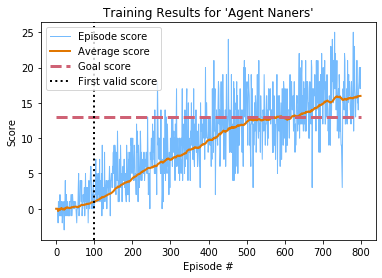

In [6]:
plot_training_scores(scores, goal_score, window=score_window_size, agent_name=agent.name)

In [10]:
# demo the current notebook's agent to watch performance in real time
# uncomment the lines below to run demo

#from demos import demo_agent
#demo_agent(env, agent, n_episodes=3, epsilon=0.05, seed=SEED)


Running demo of 'Agent Naners' with epsilon=0.05
Episode 1	Score: 16.00
Episode 2	Score: 15.00
Episode 3	Score: 21.00

Demo complete! Scores:	Min:15.00	Max:21.00	Avg:17.333


[16.0, 15.0, 21.0]

In [11]:
# demo a saved agent by loading it from disk
# uncomment the lines below to run demo

#from demos import demo_saved_agent
#saved_agent_name = 'Agent Naners'
#demo_saved_agent(env, saved_agent_name, n_episodes=1, epsilon=0.05, seed=SEED)

Agent Naners: h[32, 32], exp[100000, 64], u,c[4, 8], g,t,lr[0.99, 0.001, 0.0005]

Running demo of 'Agent Naners' with epsilon=0.05
Episode 1	Score: 19.00

Demo complete! Scores:	Min:19.00	Max:19.00	Avg:19.000


[19.0]

In [ ]:
# close the environment when finished
env.close()